In [2]:
from tqdm import tqdm
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv('Data.csv')
df_backup = df
df.head(10)
df

,id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1,18600,10.99,608.86,B,6 years,RENT,80000.00,Fully Paid,12.92,...,0.0,0.00,0.0000,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2,2000,17.97,72.28,D,4 years,MORTGAGE,55400.00,Current,10.62,...,0.0,0.00,0.0000,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,3,12000,12.29,400.24,C,10+ years,OWN,60000.00,Fully Paid,17.92,...,0.0,0.00,0.0000,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,4,16000,19.42,589.90,D,7 years,RENT,64000.00,Current,3.90,...,0.0,0.00,0.0000,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,5,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.00,Fully Paid,19.08,...,0.0,0.00,0.0000,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
5,6,19000,16.99,472.10,D,1 year,RENT,65000.00,Charged Off,15.66,...,0.0,1863.64,335.4552,472.10,0.0,Individual,0.0,234.0,13167.0,24600.0
6,7,6000,9.17,191.28,B,10+ years,OWN,147000.00,Fully Paid,4.00,...,0.0,0.00,0.0000,152.92,0.0,Individual,0.0,381.0,2686.0,12400.0
7,8,17000,5.32,511.96,A,10+ years,MORTGAGE,75000.00,Current,7.89,...,0.0,0.00,0.0000,511.96,0.0,Individual,0.0,0.0,191633.0,45700.0
8,9,26375,24.50,766.43,F,10+ years,MORTGAGE,71596.18,Fully Paid,22.59,...,0.0,0.00,0.0000,14426.38,0.0,Individual,0.0,510.0,273060.0,19900.0
9,10,10000,18.45,256.39,D,4 years,RENT,48000.00,Current,28.03,...,0.0,0.00,0.0000,256.39,0.0,Individual,0.0,0.0,132034.0,38100.0


In [4]:
#Checking most common category for loan_status
print(df['loan_status'].value_counts())

loan_status
Fully Paid                                             104143
Current                                                 91999
Charged Off                                             26102
Late (31-120 days)                                       2215
In Grace Period                                           955
Late (16-30 days)                                         386
Does not meet the credit policy. Status:Fully Paid        201
Does not meet the credit policy. Status:Charged Off        60
Default                                                     6
Name: count, dtype: int64


In [5]:
#Checking for empty records in all variables
check_na=df.isna().sum()
df_dropped=df
for index in check_na.index:
    if check_na[index] > 10:
        df_dropped = df_dropped.drop([index], axis=1)

In [6]:
df_backup=df_dropped
df=df_dropped
del df_dropped

In [7]:
#Loan status string to dummy
df['loan_dummy'] = np.where(df['loan_status'] == 'Charged Off', 1, 0)

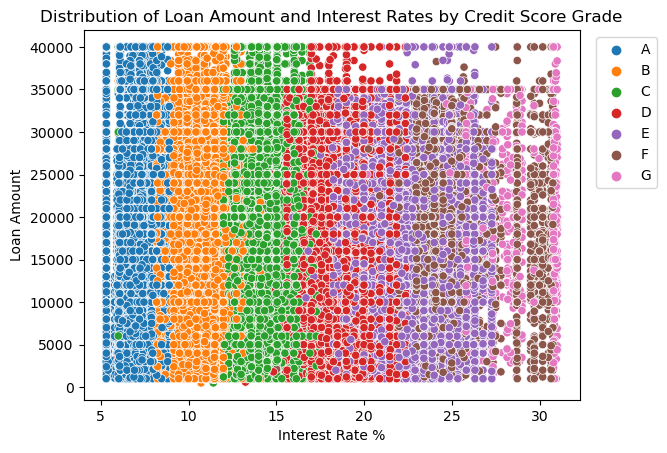

In [8]:
#Data Visualisation
grade_order = ['A','B','C','D','E','F','G']
sns.scatterplot(x='int_rate', y='loan_amnt', hue='grade', data=df, hue_order=grade_order)
plt.title('Distribution of Loan Amount and Interest Rates by Credit Score Grade')
plt.xlabel('Interest Rate %')
plt.ylabel('Loan Amount')
plt.legend(loc='upper right', bbox_to_anchor=(1.17,1))
plt.show()

In [9]:
#Define target and predictors
y = df['loan_dummy'].values
x = df[['loan_amnt', 'int_rate', 'annual_inc', 'total_pymnt', 'installment', 'total_rec_int', 'last_pymnt_amnt']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [11]:
logreg = LogisticRegression(max_iter=1000000, fit_intercept=False).fit(X_train, y_train)

In [12]:
#Generating the prediciton of the unpenalised regression
yhat=logreg.predict(X_test)

In [13]:
#Plotting the cofficients of the unpenalised regression
logreg.coef_

array([[-9.04335134e-05, -4.35275747e-02, -9.40623646e-06,
        -1.53663004e-04,  4.69575235e-03,  3.99931737e-04,
        -1.40456501e-03]])

In [14]:
#Confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, yhat))

[[59781   209]
 [ 7757    74]]


In [15]:
#Generating the no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

In [16]:
#Probabilities
lr_probs = logreg.predict_proba(X_test)[:,1]

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

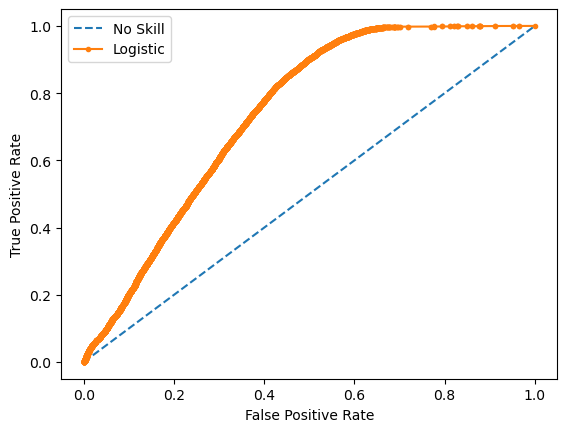

In [18]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Estimating a classification tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
dtree = DecisionTreeClassifier(ccp_alpha=0,max_depth = 4)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=4)

Compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

In [21]:
ft_probs = dtree.predict_proba(X_test)[:, 1]
roc_auc_firstTree = roc_auc_score(y_test, ft_probs)
roc_auc_ns = roc_auc_score(y_test, ns_probs)
roc_auc_lr = roc_auc_score(y_test, lr_probs)
print("ROC AUC Score for No Skill prediction method:", roc_auc_ns)
print("ROC AUC Score for the Logistic Regression method:", roc_auc_lr)
print("ROC AUC Score for first Classification Tree method:", roc_auc_firstTree)

ROC AUC Score for No Skill prediction method: 0.5
ROC AUC Score for the Logistic Regression method: 0.7395292790146845
ROC AUC Score for first Classification Tree method: 0.8044581420361444


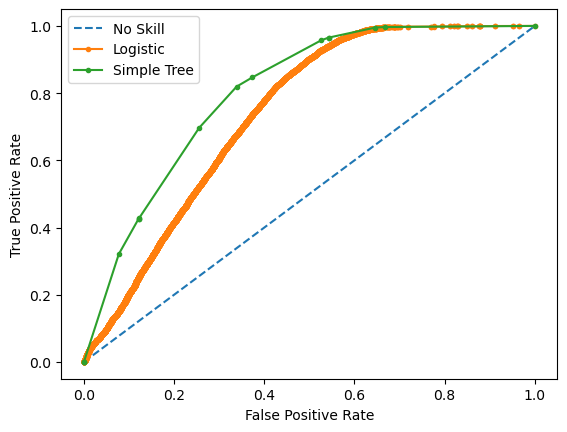

In [22]:
ft_fpr, ft_tpr, _ = roc_curve(y_test, ft_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ft_fpr, ft_tpr, marker='.', label='Simple Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Ex 13: Let now re-calculate a classification tree but with the max_depth and the min_samples_leaf parameters estimated by a 5-fold cross-validation method.

In [23]:
#dtree2 is our second classification tree with k-fold method for cross-validation
dtree2 = DecisionTreeClassifier(ccp_alpha=0)

#Returns error "The 'min_samples_leaf' parameter of DecisionTreeClassifier must be an int in the range [1, inf) or a float in the range (0.0, 1.0). Got 1.5 instead."
params_dtree2 = {'max_depth': [2,3,4,6],
             'min_samples_leaf': [1, 2]}

dt2 = GridSearchCV(estimator=dtree2,
                   param_grid=params_dtree2,
                   scoring = 'accuracy',
                   cv=5,
                   verbose=1,
                   n_jobs=-1)

#20 fits failed out of a total of 60.
#The score on these train-test partitions for these parameters will be set to nan."
dt2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6], 'min_samples_leaf': [1, 2]},
             scoring='accuracy', verbose=1)

In [24]:
crossVTree_probs = dt2.predict_proba(X_test)[:, 1]

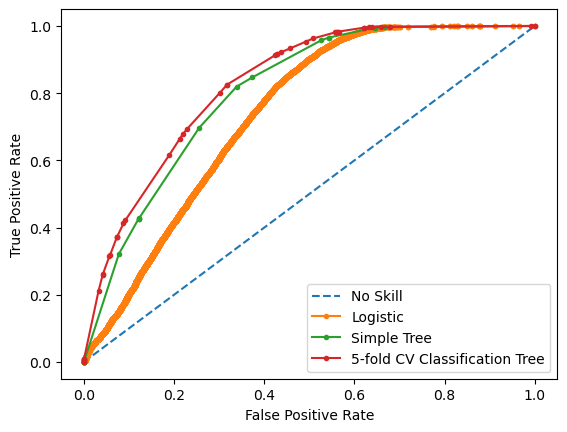

In [25]:
crossVTree_fpr, crossVTree_tpr, _ = roc_curve(y_test, crossVTree_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ft_fpr, ft_tpr, marker='.', label='Simple Tree')
plt.plot(crossVTree_fpr, crossVTree_tpr, marker='.', label='5-fold CV Classification Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [26]:
roc_auc_crossVTree = roc_auc_score(y_test, crossVTree_probs)
print("ROC AUC Score for No Skill prediction method:", roc_auc_ns)
print("ROC AUC Score for the Logistic Regression method:", roc_auc_lr)
print("ROC AUC Score for first Classification Tree method:", roc_auc_firstTree)
print("ROC AUC Score for 5-fold CV Classification Tree method:", roc_auc_crossVTree)

ROC AUC Score for No Skill prediction method: 0.5
ROC AUC Score for the Logistic Regression method: 0.7395292790146845
ROC AUC Score for first Classification Tree method: 0.8044581420361444
ROC AUC Score for 5-fold CV Classification Tree method: 0.8275183266508322


Estimating a random forest
n_estimators = 10

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = 10
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [10, 20, 40]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rd = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 2, random_state = 41, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rf_probs = rf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

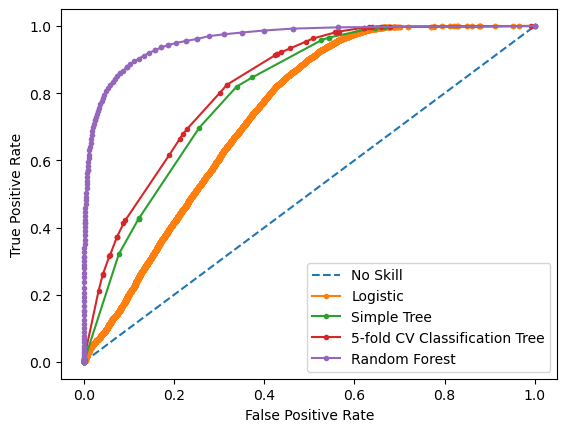

In [42]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ft_fpr, ft_tpr, marker='.', label='Simple Tree')
plt.plot(crossVTree_fpr, crossVTree_tpr, marker='.', label='5-fold CV Classification Tree')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [43]:
roc_auc_rf = roc_auc_score(y_test, rf_probs)
print("ROC AUC Score for No Skill prediction method:", roc_auc_ns)
print("ROC AUC Score for the Logistic Regression method:", roc_auc_lr)
print("ROC AUC Score for first Classification Tree method:", roc_auc_firstTree)
print("ROC AUC Score for 5-fold CV Classification Tree method:", roc_auc_crossVTree)
print("ROC AUC Score for Random Forest method:", roc_auc_rf)

ROC AUC Score for No Skill prediction method: 0.5
ROC AUC Score for the Logistic Regression method: 0.7395292790146845
ROC AUC Score for first Classification Tree method: 0.8044581420361444
ROC AUC Score for 5-fold CV Classification Tree method: 0.8275183266508322
ROC AUC Score for Random Forest method: 0.9605790340615447


In [44]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

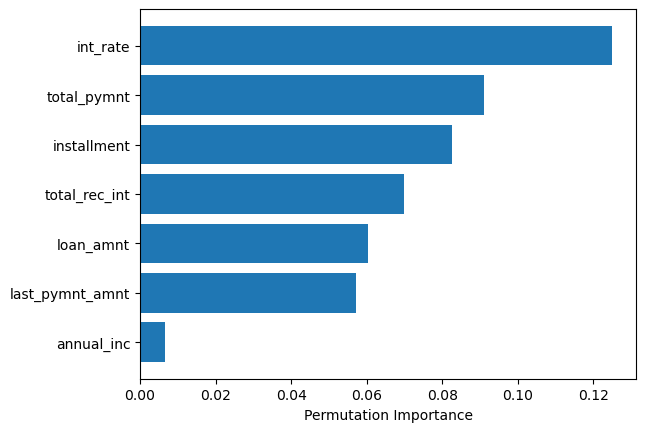

In [45]:
sorted_vars = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_vars], perm_importance.importances_mean[sorted_vars])
plt.xlabel('Permutation Importance')
plt.show()